## Histograms of Oriented Gradients (HOG)

With the ORB algorithm, we use keypoints in images to do keypoint-based matching to detect objects in images. These type of algorithms work great to detect objects that have a lot of consistent internal features that are not affected by the background. For example, for facial detection because faces have a lot of consistent internal features that don’t get affected by the image background, such as the eyes, nose, and mouth. 

However, these type of algorithms don’t work so well when attempting to do more general object recognition, for example, pedestrian detection in images. People don’t have consistent internal features, like faces do, because the body shape and style of every person is different (see Fig. 1). This means that every person is going to have a different set of internal features, and so something that can more generally describe a person is needed.

<br>
<figure>
  <center><img src = "./cell/pedestrians.jpeg" width = "30%" style = "border: thin silver solid; padding: 10px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 1. - Pedestrians.</figcaption>
</figure> 
<br>

One option is to try to detect pedestrians by their contours instead.  Detecting objects in images by their contours (boundaries) is very challenging because of the difficulties brought about by the contrast between the background and the foreground. For example, a pedestrian in an image that is walking in front of a white building, wearing a white coat and black pants (see Fig. 2) will be extremely hard to detect. The background of the image is mostly white, the black pants are going to have a very high contrast, but the coat, since it is white as well, is going to have very low contrast. In this case, detecting the edges of pants is going to be easy but detecting the edges of the coat is going to be very difficult. 

This is where **HOG** comes in. HOG stands for **Histograms of Oriented Gradients** and it was first introduced by Navneet Dalal and Bill Triggs in 2005.

<br>
<figure>
  <center><img src = "./cell/woman.jpg" width = "30%" style = "border: thin silver solid; padding: 10px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 2. - High and Low Contrast.</figcaption>
</figure> 
<br>

The HOG algorithm works by creating histograms of the distribution of gradient orientations in an image and then normalizing them in a very special way. This special normalization is what makes HOG so effective at detecting the edges of objects even in cases where the contrast is very low. These normalized histograms are put together into a feature vector, known as the HOG descriptor, that can be used to train a machine learning algorithm, such as a Support Vector Machine (SVM), to detect objects in images based on their boundaries (edges). Due to its great success and reliability, HOG has become one of the most widely used algorithms in computer vison for object detection.

### The HOG Algorithm

<br>
<figure>
  <center><img src = "./cell/HOG Diagram2.png" width = "50%" style = "border: thin silver solid; padding: 1px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 3. - HOG Diagram.</figcaption>
</figure> 
<br>

The HOG algorithm, is based on creating histograms from the orientation of image gradients. The HOG algorithm is implemented in a series of steps:

1. Given the image of particular object, set a detection window (region of interest) that covers the entire object in the image (Fig. 3).

2. Calculate the magnitude and direction of the gradient for each individual pixel in the detection window.

3. Divide the detection window into connected *cells* of pixels, with all cells being of the same size (Fig. 3). The size of the cells is a free parameter and it is usually chosen so as to match the scale of the features that want to be detected. For example, in a 64 x 128 pixel detection window, square cells 6 to 8 pixels wide are suitable for detecting human limbs.

4. Create a Histogram for each cell, by first grouping the gradient directions of all pixels in each cell into a particular number of orientation (angular) bins; and then adding up the gradient magnitudes of the gradients in each angular bin (Fig. 3). The number of bins in the histogram is a free parameter and it is usually set to 9 angular bins.

5. Group adjacent cells into *blocks* (Fig. 3). The number of cells in each block is a free parameter and all blocks must be of the same size. The distance between each block (known as the stride) is a free parameter but it is usually set to half the block size, in which case you will get overlapping blocks (*see video below*).  The HOG algorithm has been shown empirically to work better with overlapping blocks.

6. Use the cells contained within each block to normalize the cell histograms in that block (Fig. 3). For overlapping blocks most cells will be normalized with respect to different blocks (*video below*). Therefore, the same cell may have several different normalizations.

7. Collect all the normalized histograms from all the blocks into a single feature vector called the HOG descriptor.

8. Use the resulting HOG descriptors from many images of the same type of object to train a machine learning algorithm, such as an SVM, to detect those type of objects in images. For example, the HOG descriptors from many images of pedestrians can be used to train an SVM to detect pedestrians in images. The training is done with both positive and negative examples of the object that has to be detected in an image.

9. Once the SVM has been trained, a sliding window approach is used to try to detect and locate objects in images.  Detecting an object in the image entails finding the part of the image that looks similar to the HOG pattern learned by the SVM.

<figure>
<center><video src = "./cell/HOG Animation - Medium.mp4" width="50%" controls autoplay loop> </video><center>
<figcaption style = "text-align:center; font-style:italic">Vid. 1. - HOG Animation.</figcaption>
</figure> 

### Why The HOG Algorithm Works

HOG creates histograms by adding the magnitude of the gradients in particular orientations in localized portions of the image called *cells*.  By doing this we guarantee that stronger gradients will contribute more to the magnitude of their respective angular bin, while the effects of weak and randomly oriented gradients resulting from noise are minimized. In this manner the histograms tell us the dominant gradient orientation of each cell. 


#### Dealing with contrast 

Now, the magnitude of the dominant orientation can vary widely due to variations in local illumination and the contrast between the background and the foreground.

To account for the background-foreground contrast differences, the HOG algorithm tries to detect edges locally. In order to do this, it defines groups of cells, called **blocks**, and normalizes the histograms using this local group of cells. By normalizing locally, the HOG algorithm can detect the edges in each block very reliably; this is called **block normalization**.

In addition to using block normalization, the HOG algorithm also uses overlapping blocks to increase its performance. By using overlapping blocks, each cell contributes several independent components to the final HOG descriptor, where each component corresponds to a cell being normalized with respect to a different block. This may seem redundant but, it has been shown empirically that by normalizing each cell several times with respect to different local blocks, the performance of the HOG algorithm increases dramatically. 

### Importing Resources

In [1]:
import cv2
import numpy as np
import copy

import matplotlib.pyplot as plt

### Loading Images

The original image has shape:  (250, 250, 3)
The gray scale image has shape:  (250, 250)


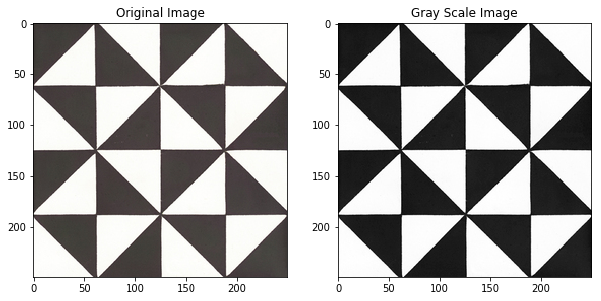

In [2]:
# Setting the default figure size
plt.rcParams['figure.figsize'] = [10, 5]

# Loading the image 
image = cv2.imread('./images/triangle_tile.jpeg')

# Converting the original image to RGB
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converting the original image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Printing the shape of the original and gray scale images
print('The original image has shape: ', original_image.shape)
print('The gray scale image has shape: ', gray_image.shape)

# Displaying the images
plt.subplot(121)
plt.imshow(original_image)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Scale Image')
plt.show()

### Creating The HOG Descriptor

We will be using OpenCV’s `HOGDescriptor` class to create the HOG descriptor. The parameters of the HOG descriptor are setup using the `HOGDescriptor()` function. The parameters of the `HOGDescriptor()` function and their default values are given below:

`cv2.HOGDescriptor(win_size = (64, 128),  
                  block_size = (16, 16),  
                  block_stride = (8, 8),  
                  cell_size = (8, 8),  
                  nbins = 9,  
                  win_sigma = DEFAULT_WIN_SIGMA,  
                  threshold_L2hys = 0.2,  
                  gamma_correction = true,  
                  nlevels = DEFAULT_NLEVELS)`

***Parameters***

* `win_size` – *Size*  
Size of detection window in pixels (*width, height*). Defines the region of interest. Must be an integer multiple of cell size.


* `block_size` – *Size*  
Block size in pixels (*width, height*). Defines how many cells are in each block. Must be an integer multiple of cell size and it must be smaller than the detection window. The smaller the block the finer detail we will get.


* `block_stride` – *Size*  
Block stride in pixels (*horizontal, vertical*). It must be an integer multiple of cell size. The `block_stride` defines the distance between adjecent blocks, for example, 8 pixels horizontally and 8 pixels vertically. Longer `block_strides` makes the algorithm run faster (because less blocks are evaluated) but the algorithm may not perform as well.


* `cell_size` – *Size*  
Cell size in pixels (*width, height*). Determines the size of the cell. The smaller the cell the finer detail we will get. It should be chosen in such a way that the resulting Block Size is smaller than the detection window.


* `nbins` – *int*  
Number of bins for the histograms. Determines the number of angular bins used to make the histograms. With more bins we can capture more gradient directions. HOG uses unsigned gradients, so the angular bins will have values between 0 and 180 degrees.


* `win_sigma` – *double*  
Gaussian smoothing window parameter. The performance of the HOG algorithm can be improved by smoothing the pixels near the edges of the blocks by applying a Gaussian spatial window to each pixel before computing the histograms.


* `threshold_L2hys` – *double*  
L2-Hys (Lowe-style clipped L2 norm) normalization method shrinkage. The L2-Hys method is used to normalize the blocks and it consists of an L2-norm followed by clipping and a renormalization. The clipping limits the maximum value of the descriptor vector for each block to have the value of the given threshold (0.2 by default). After the clipping the descriptor vector is renormalized as described in *IJCV*, 60(2):91-110, 2004.


* `gamma_correction` – *bool*  
Flag to specify whether the gamma correction preprocessing is required or not. Performing gamma correction slightly increases the performance of the HOG algorithm.


* `nlevels` – *int*  
Maximum number of detection window increases.

The  `cv2.HOGDescriptor()`function supports a wide range of parameters. The first few arguments (`block_size, block_stride, cell_size`, and `nbins`) are probably the ones that are most likely to be changed. The other parameters can be safely left at their default values to get good results. 

After using the `cv2.HOGDescriptor()`function to set the cell size, block size, block stride, and the number of bins for the histograms of the HOG descriptor. We will use `.compute(image)` method to compute the HOG descriptor (feature vector) for the given `image`.

In [3]:
# Specifying the parameters for the HOG descriptor
cell_size = (6, 6)
num_cells_per_block = (2, 2)
block_size = (num_cells_per_block[0] * cell_size[0],
              num_cells_per_block[1] * cell_size[1])

# Calculating the number of cells that fit in our image in the x and y directions
x_cells = gray_image.shape[1] // cell_size[0]
y_cells = gray_image.shape[0] // cell_size[1]

# Horizontal and Vertical distance between blocks in units of Cell Size
# Must be set such that (x_cells - num_cells_per_block[0]) / h_stride = integer
# Similarly, (y_cells - num_cells_per_block[1]) / v_stride = integer
h_stride = 1
v_stride = 1

# Block Stride in pixels (horizantal, vertical)
block_stride = (cell_size[0] * h_stride, cell_size[1] * v_stride)

# Number of gradient orientation bins
num_bins = 9        

# Specifying the size of the detection window (Region of Interest) in pixels (width, height)
# Detection window might be slightly smaller than the image based on cell size
win_size = (x_cells * cell_size[0] , y_cells * cell_size[1])

# Printing the shape of the gray scale image
print('Grayscale Image Shape: ', gray_image.shape)

# Printing the parameters of our HOG descriptor
print('HOG Descriptor Parameters:')
print('\t Window Size:', win_size)
print('\t Cell Size:', cell_size)
print('\t Block Size:', block_size)
print('\t Block Stride:', block_stride)
print('\t Number of Bins:', num_bins)

# Set the parameters of the HOG descriptor
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute the HOG Descriptor for the gray scale image
hog_descriptor = hog.compute(gray_image)

Grayscale Image Shape:  (250, 250)
HOG Descriptor Parameters:
	 Window Size: (246, 246)
	 Cell Size: (6, 6)
	 Block Size: (12, 12)
	 Block Stride: (6, 6)
	 Number of Bins: 9


### Number of Elements in the HOG Descriptor

The resulting HOG Descriptor (feature vector), contains the normalized histograms from all cells from all blocks in the detection window concatenated in one long vector. Therefore, the size of the HOG feature vector can be given as:

$$ n_{Total\ Elements} = n_{Blocks} * n_{Cells\ per\ Block} * n_{Bins} $$

The total number of blocks for the general case (*i.e.* for any `block_stride` and `block_size`) considering the `block_size`, `block_stride`, and `window_size`are all defined in terms of the `cell_size` can be given by:

$$ Total_x = \frac{{Cells}_x - {n}_{Cells\ per\ Block}}{{N}_x} + 1 $$

Where, ${Cells}_x$ is the total number of cells along the width of the detection window. And $N_x$ is the horizontal block stride in units of `cell_size`. This formula for takes into account the extra blocks that result from overlapping.

$$n_{Blocks} = Total_x * Total_y$$

Where $Total_x$, is the total number of blocks along the width of the detection window, similarly $Total_y$ will be the total number of blocks along the height of the detection window.

In [4]:
# Calculating the total number of blocks along the detection window
tot_bx = np.uint32(((x_cells - num_cells_per_block[0]) / h_stride) + 1)
tot_by = np.uint32(((y_cells - num_cells_per_block[1]) / v_stride) + 1)

# Calculating the total number of elements in the feature vector
tot_els = (tot_bx) * (tot_by) * num_cells_per_block[0] * num_cells_per_block[1] * num_bins

# Print the total number of elements the HOG feature vector should have
print('Total number of elements in HOG Feature Vector should be: ',
      tot_bx, 'x',
      tot_by, 'x',
      num_cells_per_block[0], 'x',
      num_cells_per_block[1], 'x',
      num_bins, '=',
      tot_els)

# Printing the shape of the HOG Descriptor to check that it matches
print('\nHOG Descriptor Shape:', hog_descriptor.shape)

Total number of elements in HOG Feature Vector should be:  40 x 40 x 2 x 2 x 9 = 57600

HOG Descriptor Shape: (57600, 1)


### Visualizing The HOG Descriptor

For visualizing the HOG Descriptor we will be plotting the histogram associated with each cell. We will plot each bin in the histogram as a single vector whose magnitude is given by the height and its orientation is given by the angular bin. Since any given cell might have multiple histograms associated with it, due to the overlapping blocks, we will average all the histograms for each cell to produce a single histogram.

OpenCV has no easy way to visualize the HOG Descriptor, so we will do some manipulation in order to visualize it. We will start by reshaping the HOG Descriptor and then compute the average histogram of each cell and finally converting the histogram bins into vectors. Finally, we will plot the corresponding vectors for each cell in an image. 

In [5]:
# Reshaping the feature vector to [blocks_y, blocks_x, num_cells_per_block_x, num_cells_per_block_y, num_bins]
# blocks_x (column) and blocks_y(row) will be transposed. This is useful for plotting the feature vector, 
# so that the feature vector indexing matches the image indexing.
hog_descriptor_reshaped = hog_descriptor.reshape(tot_bx,
                                                 tot_by,
                                                 num_cells_per_block[0],
                                                 num_cells_per_block[1],
                                                 num_bins).transpose((1, 0, 2, 3, 4))

# Printing useful information
print('Feature Vector Shape:', hog_descriptor.shape)
print('Reshaped Feature Vector Shape:', hog_descriptor_reshaped.shape)

# Creating an array that will hold the average gradients for each cell
ave_grad = np.zeros((y_cells, x_cells, num_bins))
print('Average Gradient Array Shape: ', ave_grad.shape) 

# Creating an array that will count the number of histograms per cell
hist_counter = np.zeros((y_cells, x_cells, 1))

# Adding up all the histograms for each cell and counting the number of histograms per cell
for i in range (num_cells_per_block[0]):
    for j in range(num_cells_per_block[1]):
        ave_grad[i:tot_by + i,
                 j:tot_bx + j] += hog_descriptor_reshaped[:, :, i, j, :]
        
        hist_counter[i:tot_by + i,
                     j:tot_bx + j] += 1

# Calculating the average gradient for each cell
ave_grad /= hist_counter
   
# Calculating the total number of vectors in all the cells.
len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

# Creating an array that has num_bins equally spaced between 0 and 180 degress in radians.
deg = np.linspace(0, np.pi, num_bins, endpoint = False)

Feature Vector Shape: (57600, 1)
Reshaped Feature Vector Shape: (40, 40, 2, 2, 9)
Average Gradient Array Shape:  (41, 41, 9)


In [6]:
# Each cell will have a histogram with num_bins
# Each bin as a vector will have a height(magnitude) and angle corresponding to the bin.
# Creating a vector to hold the (x,y)-coordinate of all the vectors in all the cells in the image. 
# Also, creating a vector to hold all the (U,V)-components of all the vectors cells in the image.
U = np.zeros((len_vecs))
V = np.zeros((len_vecs))
X = np.zeros((len_vecs))
Y = np.zeros((len_vecs))

# Set the counter to zero
counter = 0

# Calculating the vector components (U,V) from their maginitudes
for i in range(ave_grad.shape[0]):
    for j in range(ave_grad.shape[1]):
        for k in range(ave_grad.shape[2]):
            U[counter] = ave_grad[i,j,k] * np.cos(deg[k])
            V[counter] = ave_grad[i,j,k] * np.sin(deg[k])
        
            X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
            Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)
        
            counter = counter + 1

<IPython.core.display.Javascript object>


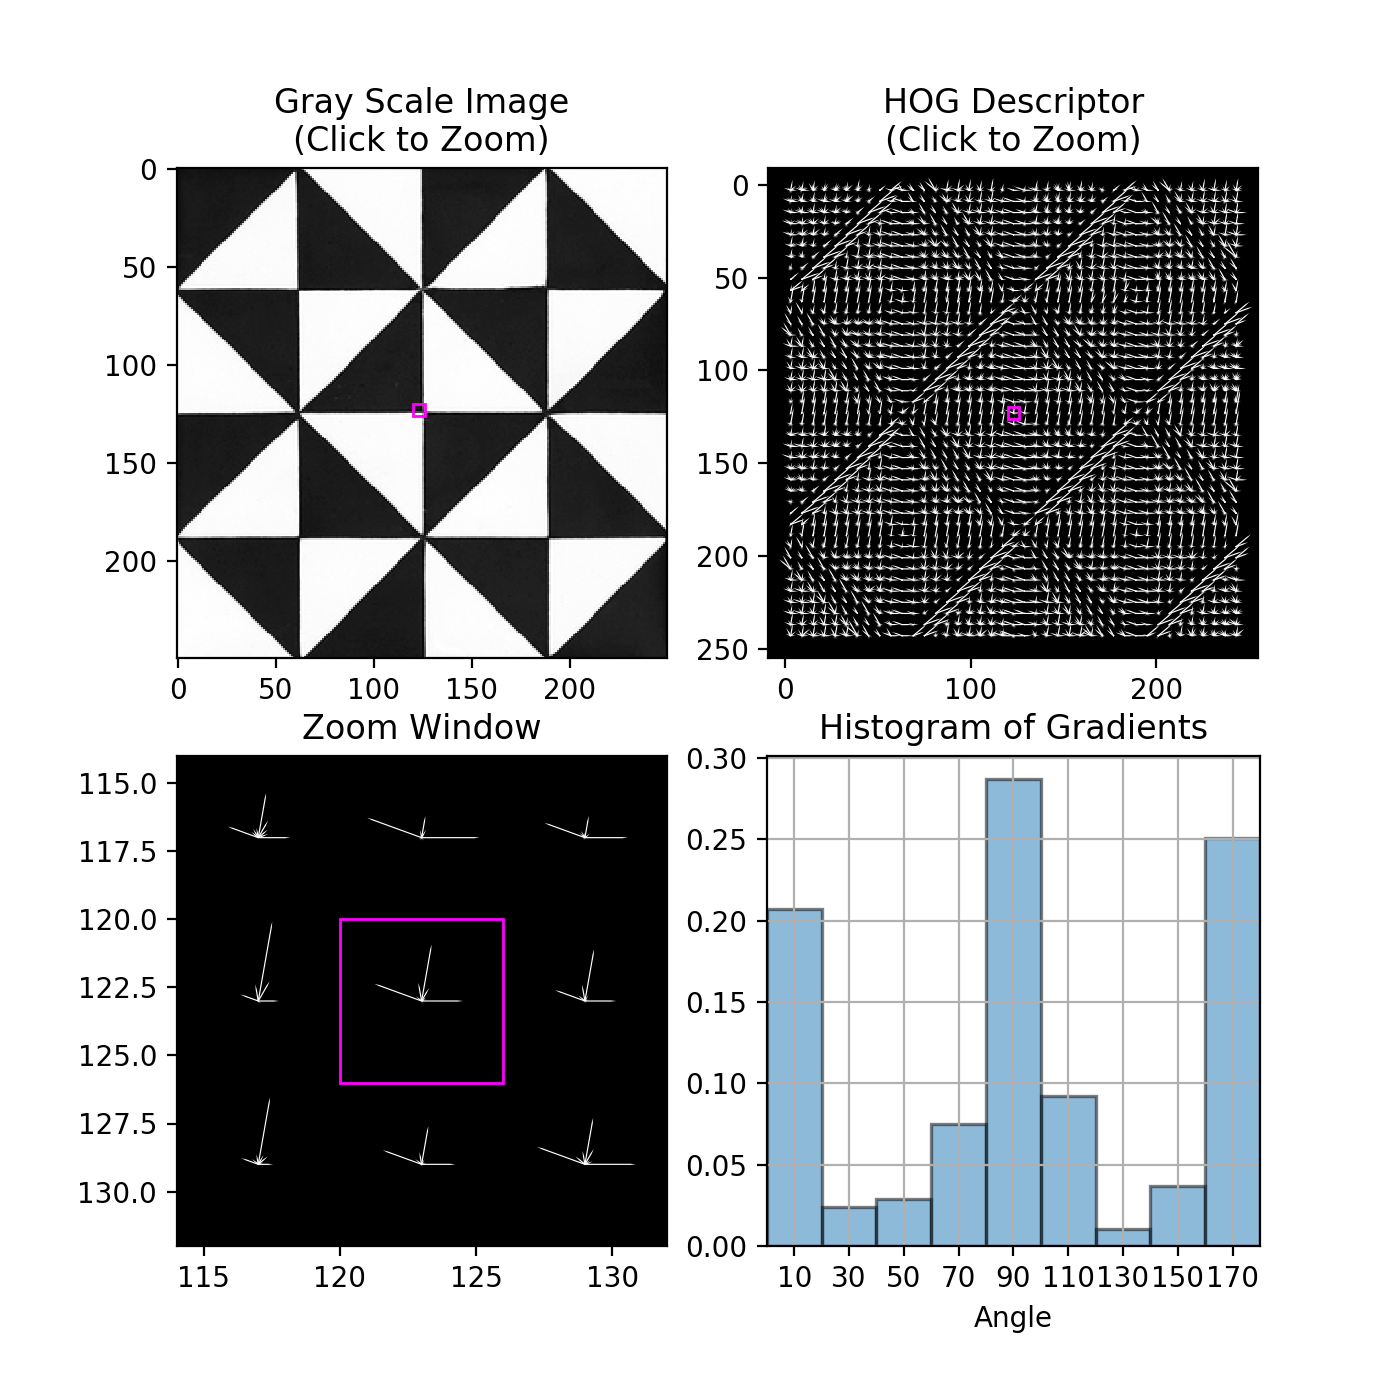

In [8]:
import matplotlib.patches as patches
%matplotlib notebook

# Setting the default figure size
plt.rcParams['figure.figsize'] = [7, 7]

# Creating the bins in degress to plot our histogram.
angle_axis = np.linspace(0, 180, num_bins, endpoint = False)
angle_axis += ((angle_axis[1] - angle_axis[0]) / 2)

# Creating a figure with 4 subplots arranged in 2 x 2
fig, ((a,b),(c,d)) = plt.subplots(2,2)

# Setting the title of each subplot
a.set(title = 'Gray Scale Image\n(Click to Zoom)')
b.set(title = 'HOG Descriptor\n(Click to Zoom)')
c.set(title = 'Zoom Window', xlim = (0, 18), ylim = (0, 18), autoscale_on = False)
d.set(title = 'Histogram of Gradients')

# Plotting the gray scale image
a.imshow(gray_image, cmap = 'gray')
a.set_aspect(aspect = 1)

# Plotting the feature vector (HOG Descriptor)
b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
b.invert_yaxis()
b.set_aspect(aspect = 1)
b.set_facecolor('black')

# Defining a function for interactive zoom
def onpress(event):
    
    # Unless the left mouse button is pressed do nothing
    if event.button != 1:
        return
    
    # Only accept clicks for subplots a and b
    if event.inaxes in [a, b]:
        
        # Get mouse click coordinates
        x, y = event.xdata, event.ydata
        
        # Select the cell closest to the mouse click coordinates
        cell_num_x = np.uint32(x / cell_size[0])
        cell_num_y = np.uint32(y / cell_size[1])
        
        # Set the edge coordinates of the rectangle patch
        edgex = x - (x % cell_size[0])
        edgey = y - (y % cell_size[1])
        
        # Create a rectangle patch that matches the the cell selected above        
        rect = patches.Rectangle((edgex, edgey),
                                  cell_size[0], cell_size[1],
                                  linewidth = 1,
                                  edgecolor = 'magenta',
                                  facecolor='none')
        
        # Creating copies of the patch to use in the other subplots
        rect2 = copy.copy(rect)
        rect3 = copy.copy(rect)
        
        # Updating all subplots
        a.clear()
        a.set(title = 'Gray Scale Image\n(Click to Zoom)')
        a.imshow(gray_image, cmap = 'gray')
        a.set_aspect(aspect = 1)
        a.add_patch(rect)

        b.clear()
        b.set(title = 'HOG Descriptor\n(Click to Zoom)')
        b.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 5)
        b.invert_yaxis()
        b.set_aspect(aspect = 1)
        b.set_facecolor('black')
        b.add_patch(rect2)

        c.clear()
        c.set(title = 'Zoom Window')
        c.quiver(Y, X, U, V, color = 'white', headwidth = 0, headlength = 0, scale_units = 'inches', scale = 1)
        c.set_xlim(edgex - cell_size[0], edgex + (2 * cell_size[0]))
        c.set_ylim(edgey - cell_size[1], edgey + (2 * cell_size[1]))
        c.invert_yaxis()
        c.set_aspect(aspect = 1)
        c.set_facecolor('black')
        c.add_patch(rect3)

        d.clear()
        d.set(title = 'Histogram of Gradients')
        d.grid()
        d.set_xlim(0, 180)
        d.set_xticks(angle_axis)
        d.set_xlabel('Angle')
        d.bar(angle_axis,
              ave_grad[cell_num_y, cell_num_x, :],
              180 // num_bins,
              align = 'center',
              alpha = 0.5,
              linewidth = 1.2,
              edgecolor = 'k')

        fig.canvas.draw()

# Creating a connection between the figure and the mouse click
fig.canvas.mpl_connect('button_press_event', onpress)
plt.show()

### Understanding The Histograms

- Cell inside a triangle and not near an edge

<br>
<figure>
  <center><img src = "./cell/snapshot1.png" width = "50%" style = "border: thin silver solid; padding: 1px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 4. - Histograms Inside a Triangle.</figcaption>
</figure> 
<br>

In this case, since the triangle is nearly all of the same color there shouldn't be any dominant gradient in the selected cell. As we can clearly see in the Zoom Window and the histogram, this is indeed the case.

- Cell near a horizontal edge

<br>
<figure>
  <center><img src = "./cell/snapshot2.png" width = "50%" style = "border: thin silver solid; padding: 1px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 5. - Histograms Near a Horizontal Edge.</figcaption>
</figure> 
<br>

Since edges are areas of an image where the intensity changes abruptly, there will be a high intensity gradient in some particular direction. In the Zoom Window, we can see that the dominant gradient is pointing up, almost at 90 degrees, since that’s the direction in which there is a sharp change in intensity. Therefore, the 90-degree bin in the histogram dominates strongly over the others.

- Cell near a vertical edge

<br>
<figure>
  <center><img src = "./cell/snapshot3.png" width = "50%" style = "border: thin silver solid; padding: 1px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 6. - Histograms Near a Vertical Edge.</figcaption>
</figure> 
<br>

In this case we expect the dominant gradient in the cell to be horizontal, close to 180 degrees, since that’s the direction in which there is a sharp change in intensity. Therefore, we see the 170-degree bin in the histogram to dominate strongly over the others. But there is another dominant gradient in the cell, namely the one in the 10-degree bin. The reason for this, is because the HOG algorithm is using unsigned gradients, which means 0 degrees and 180 degrees are considered the same. Therefore, when the histograms are being created, angles between 160 and 180 degrees, contribute proportionally to both the 10-degree bin and the 170-degree bin. This results in there being two dominant gradients in the cell near the vertical edge instead of just one. 

- Cell near a diagonal edge

<br>
<figure>
  <center><img src = "./cell/snapshot4.png" width = "50%" style = "border: thin silver solid; padding: 1px"><center>
      <figcaption style = "text-align:center; font-style:italic">Fig. 7. - Histograms Near a Diagonal Edge.</figcaption>
</figure> 
<br>

To understand this, let’s first remember that gradients have an *x*-component, and a *y*-component, just like vectors. Therefore, the resulting orientation of a gradient is going to be given by the vector sum of its components. For this reason, on vertical edges the gradients are horizontal, because they only have an x-component. While on horizontal edges the gradients are vertical, because they only have a y-component. 

Consequently, on diagonal edges, the gradients are also going to be diagonal because both the *x* and *y* components are non-zero.  Since the diagonal edges in the image are close to 45 degrees, we see a dominant gradient orientation in the 50-degree bin. But there are two dominant gradients instead of just one. The reason for this is that when the histograms are being created, angles that are near the boundaries of bins, contribute proportionally to the adjacent bins.  For example, a gradient with an angle of 40 degrees, is right in the middle of the 30-degree and 50-degree bin. Therefore, the magnitude of the gradient is split evenly into the 30-degree and 50-degree bin. This results in there being two dominant gradients in the cell near the diagonal edge instead of just one.